In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module2 import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.XGBoost_Model_Module import Xgboost_model
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation, predict

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'CENTRAL MACEDONIA']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['dt_placement', 'x', 'y', 'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'Culex Greece'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Results/Culex Greece/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []

In [6]:
previous = read_data('../Datasets/Greece/CM_previous.csv')
previous

Index(['dt_placement', 'x', 'y', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean',
       'ndmi_mean', 'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std',
       'ndwi_std', 'ndbi_std', 'lst_day', 'lst_night', 'rainfall'],
      dtype='object')


,dt_placement,x,y,ndvi,ndmi,ndwi,ndbi,ndvi_mean,ndmi_mean,ndwi_mean,ndbi_mean,ndvi_std,ndmi_std,ndwi_std,ndbi_std,lst_day,lst_night,rainfall
0,2011-01-04,22.152714,40.773107,0.094009,0.659714,0.586389,-0.659714,0.080135,0.658363,0.588931,-0.658363,0.010910,0.040621,0.046902,0.040621,14061.0,13682.0,0.000000
1,2011-01-05,22.152714,40.773107,0.094009,0.659714,0.586389,-0.659714,0.080135,0.658363,0.588931,-0.658363,0.010910,0.040621,0.046902,0.040621,14061.0,13682.0,0.001655
2,2011-01-06,22.152714,40.773107,0.094009,0.659714,0.586389,-0.659714,0.080135,0.658363,0.588931,-0.658363,0.010910,0.040621,0.046902,0.040621,14061.0,13617.0,0.053989
3,2011-01-07,22.152714,40.773107,0.094009,0.659714,0.586389,-0.659714,0.080135,0.658363,0.588931,-0.658363,0.010910,0.040621,0.046902,0.040621,14037.0,13679.0,0.000000
4,2011-01-08,22.152714,40.773107,0.094009,0.659714,0.586389,-0.659714,0.080135,0.658363,0.588931,-0.658363,0.010910,0.040621,0.046902,0.040621,14037.0,13679.0,2.654808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,2022-12-08,23.845052,40.822339,0.311934,0.021765,-0.272062,-0.021765,0.306303,-0.006176,-0.278488,0.006176,0.033268,0.044250,0.037565,0.044250,14403.0,14001.0,0.000000
135015,2022-12-08,23.849832,40.793179,0.227418,-0.033615,-0.237482,0.033615,0.214330,-0.054840,-0.188473,0.054840,0.025251,0.000294,0.040532,0.000294,14425.0,13696.0,0.000000
135016,2022-12-08,23.861720,41.000945,0.192836,-0.126557,-0.227273,0.126557,0.175681,-0.130426,-0.216743,0.130426,0.044937,0.033688,0.021411,0.033688,14424.0,13764.0,0.000000
135017,2022-12-08,23.877965,40.391582,0.404412,0.004382,-0.342969,-0.004382,0.365834,0.051491,-0.309775,-0.051491,0.082102,0.066294,0.051046,0.066294,14373.0,14062.0,0.000000


In [7]:
data = feature_expansion(data, previous, env=only_env)

In [8]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [    0.      5.     14.     28.     50.     85.    144.    238.    405.6
   754.  10458. ]


In [11]:
model = Xgboost_model(model_type = model_type, learning_rate = 0.3,
                      embedding_data = embedded_data,  transformation_list = transformation_list,
                      early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)

In [24]:
data2 = data[['x', 'y', 'dt_placement', 'ndvi', 'ndwi', 'ndmi', 'ndbi', 'ndvi_mean',
       'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean', 'ndmi_std',
       'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night', 'acc_rainfall_1week',
       'acc_rainfall_2week', 'acc_rainfall_jan', 'lst_jan_day_mean',
       'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
       'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER',
       'SLOPE_mean_1km', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover',
       'null_island_distance', 'vert_distance', 'days_distance', 'mo_sin',
       'mo_cos', 'lst',
        'next_5_days_mean_lst', 'next_5_days_sum_rainfall', 'mosq_now']]

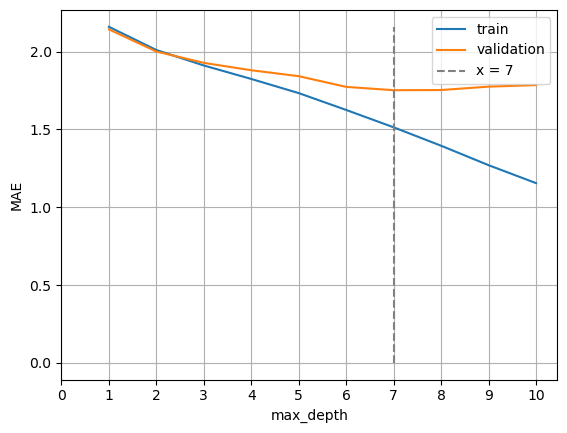

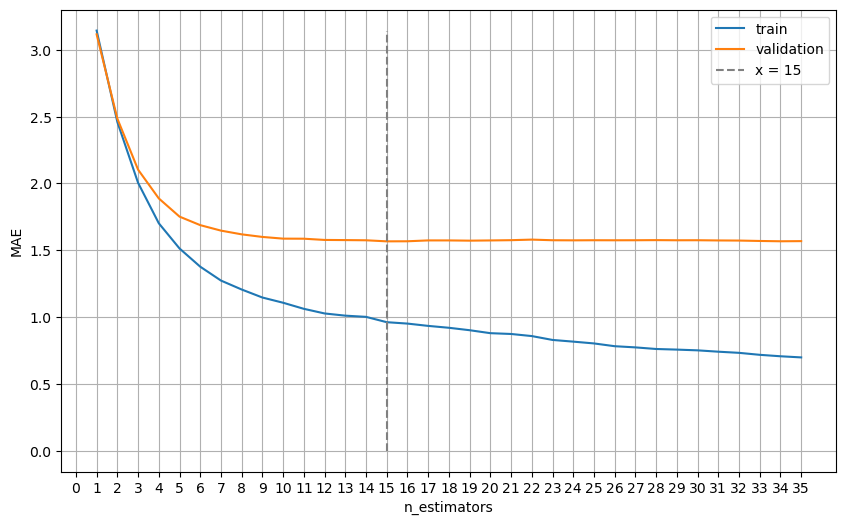

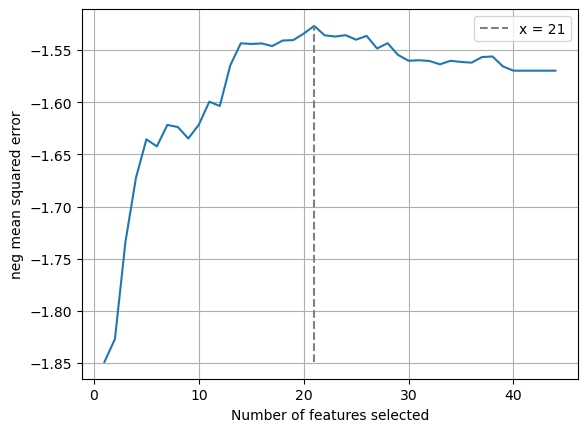

max_depth:  7
Number of estimators:  15
Selected_features:  Index(['lst_night', 'acc_rainfall_jan', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean',
       'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST',
       'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m',
       'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FLOW_ACCU_200m',
       'landcover', 'null_island_distance', 'days_distance', 'mo_cos',
       'next_5_days_mean_lst'],
      dtype='object')


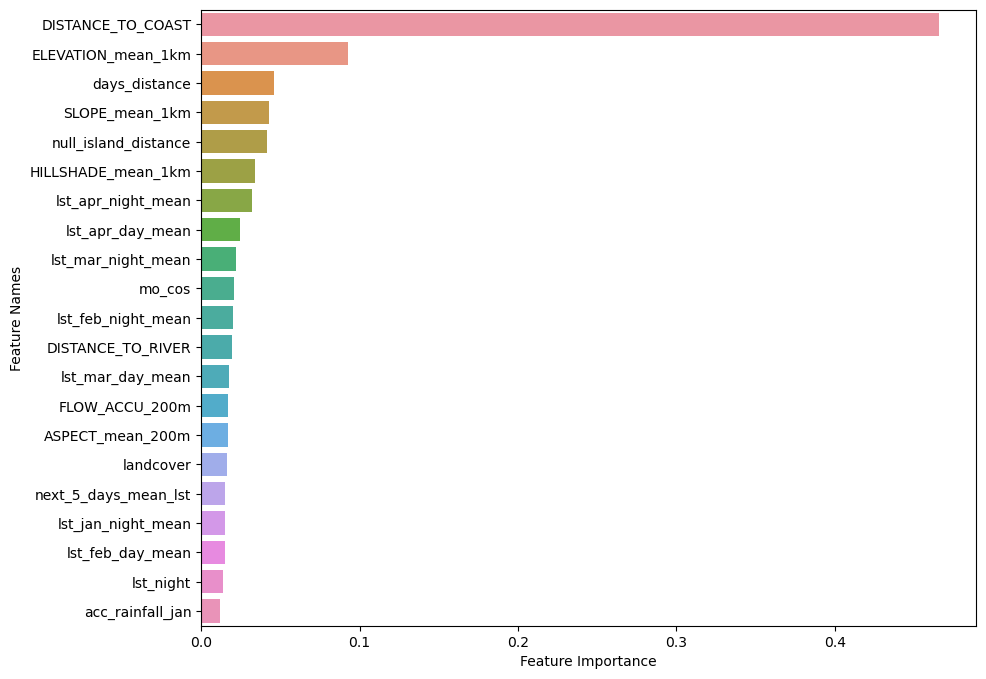

MAE on train set:  1.0736859614105123
min prediction: -0.0
max prediction: 9.0

MAE on test set:  1.5628415300546448
Error <= 3: 92.42 %
min prediction: 0.0
max prediction: 9.0


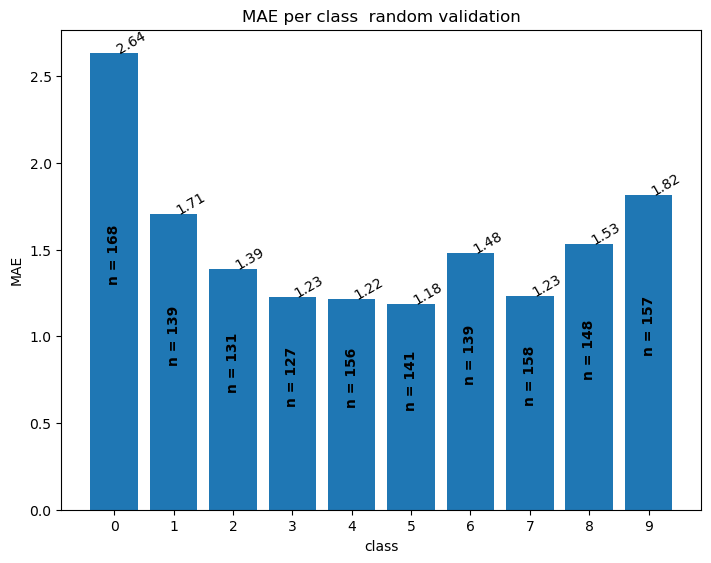

-----------|class error-MAE| difference-----------
mean: 0.4368894457784191
std: 0.24233787662762976
coefficient of variation (std/mean): 0.5546892445429737

----------normalized difference-------------
mean: 0.5317426986226562
std: 0.2949519557902433
coefficient of variation (std/mean): 0.5546892445429736


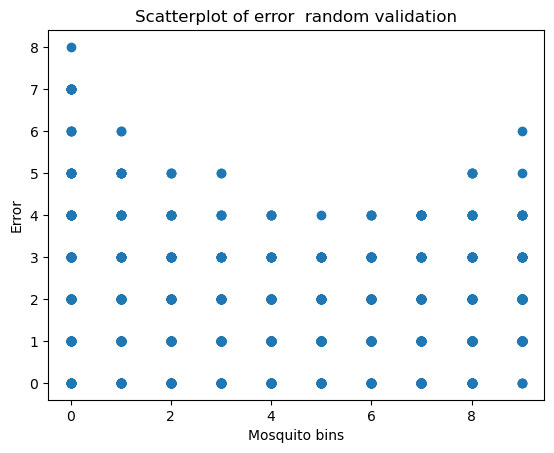

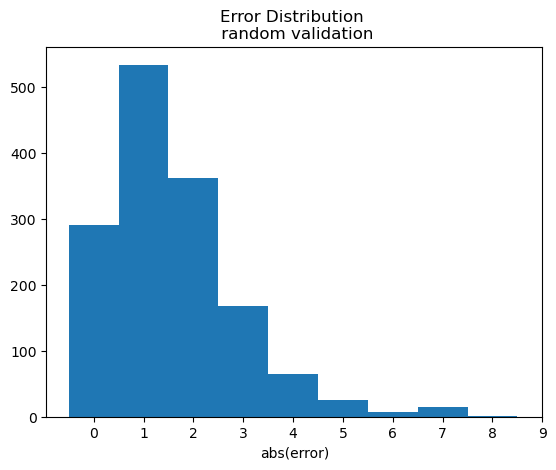

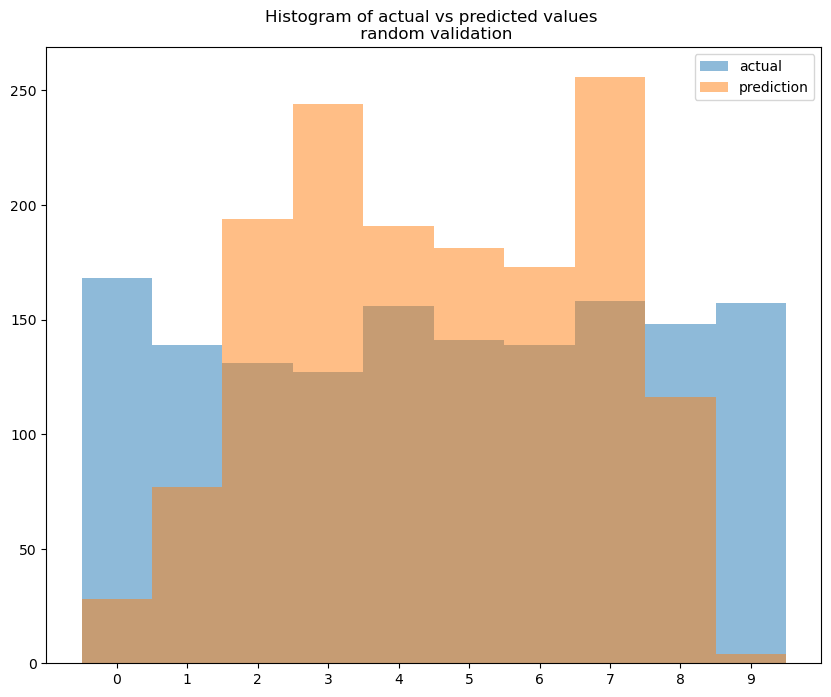

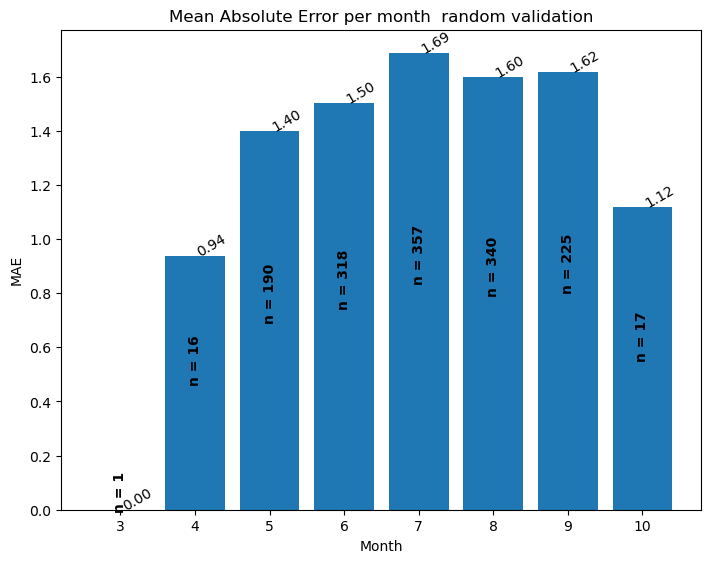

In [25]:
test_model_random_split(data2, model, filepath = '', date_col = date_col, case='', fi = True, export=exp)

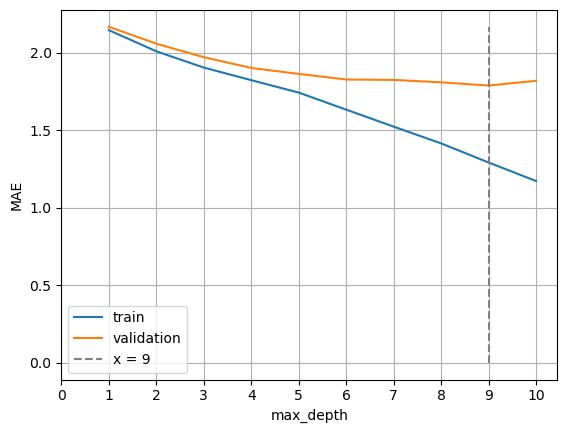

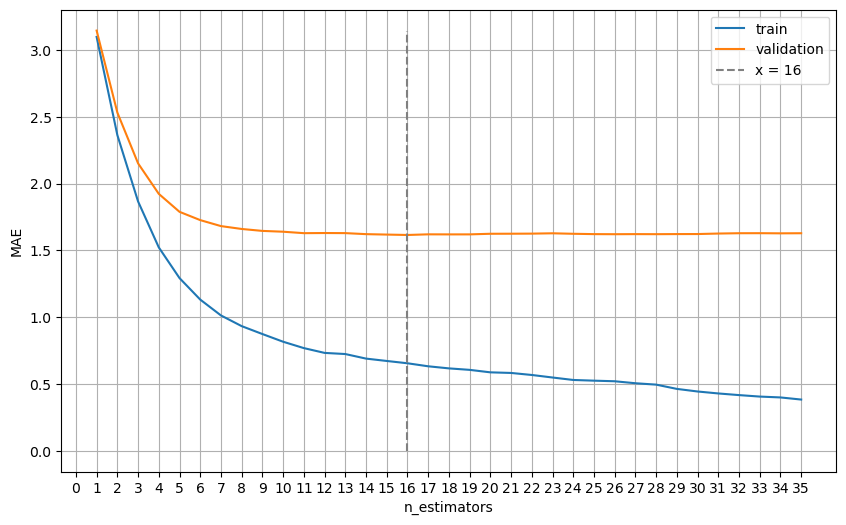

max_depth:  9
Number of estimators:  16
Selected_features:  ['x', 'y', 'ndvi', 'ndwi', 'ndmi', 'ndbi', 'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean', 'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night', 'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan', 'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'vert_distance', 'days_distance', 'mo_sin', 'mo_cos', 'lst', 'summer_days_year', 'summer_days_month']
MAE on train set:  0.6502600858888284
min prediction: -0.0
max prediction: 9.0

MAE on test set:  1.5386499727817093
Error <= 3: 91.74 %
min prediction: 0.0
max prediction: 9.0


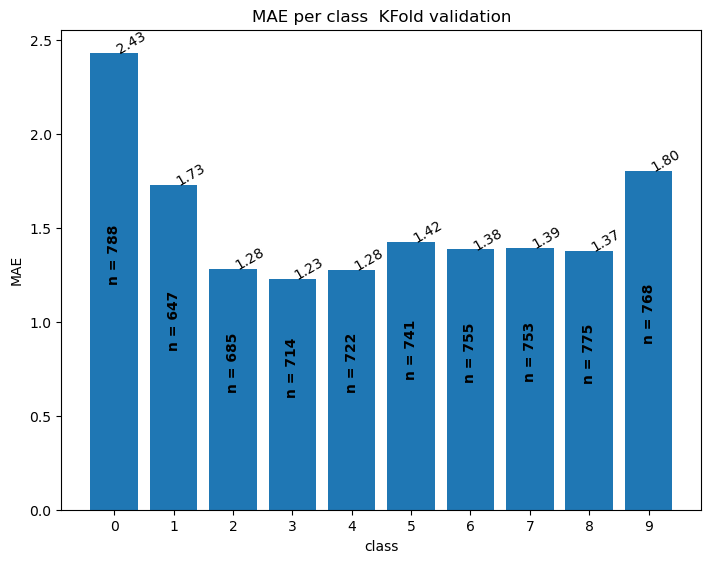

-----------|class error-MAE| difference-----------
mean: 0.39495912509406483
std: 0.19537851767676304
coefficient of variation (std/mean): 0.49468034858096016

----------normalized difference-------------
mean: 0.6262325461924695
std: 0.30978493424323295
coefficient of variation (std/mean): 0.49468034858096


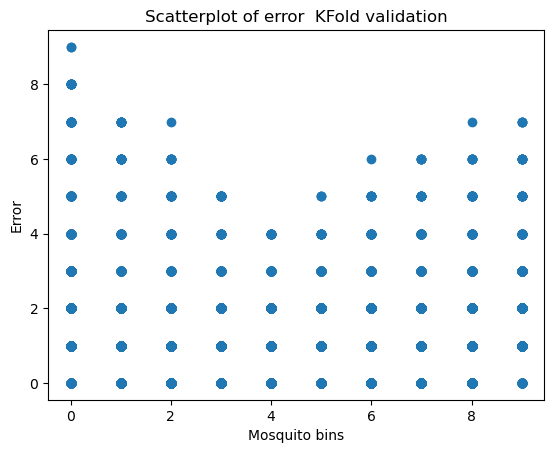

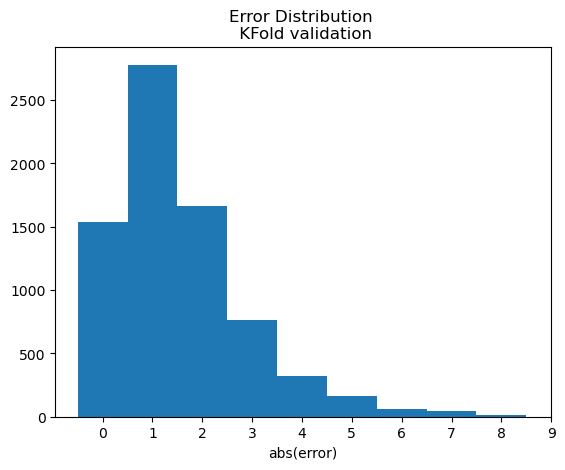

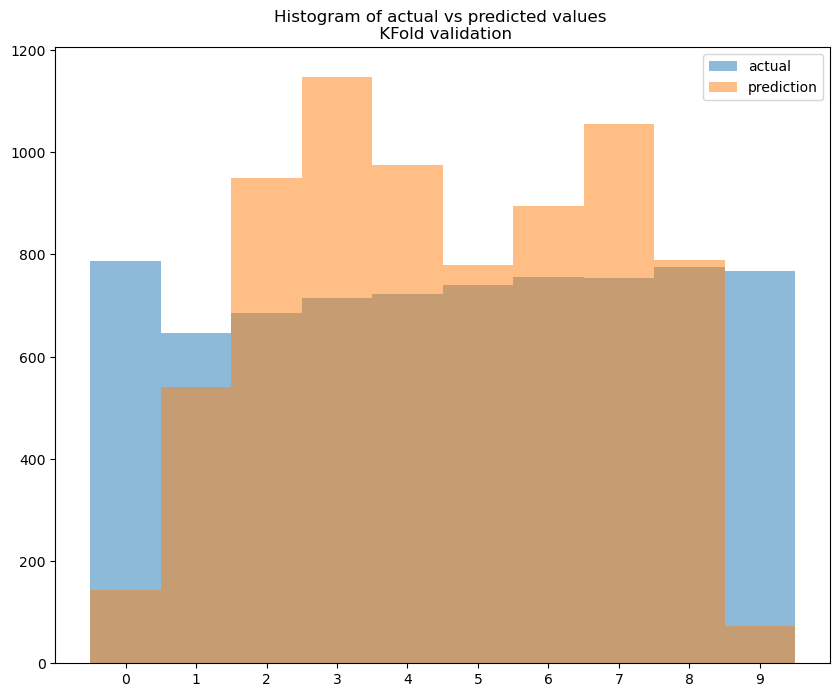

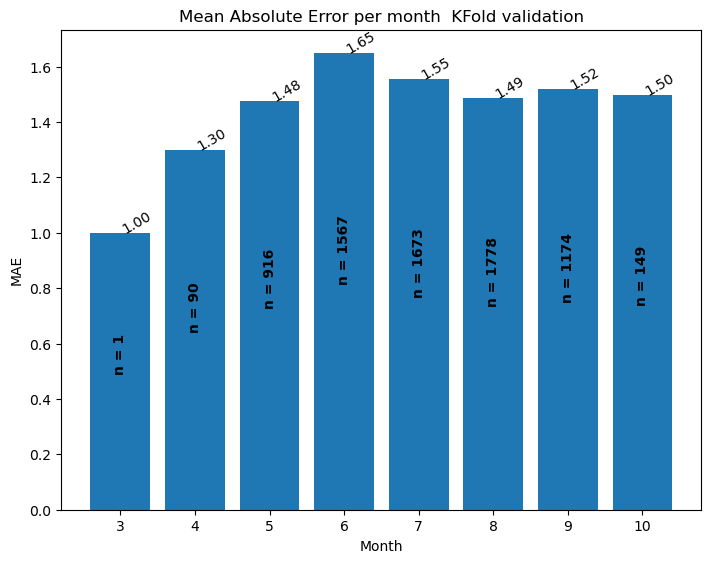

In [9]:
train_model_KFold(data, model, date_col=date_col)

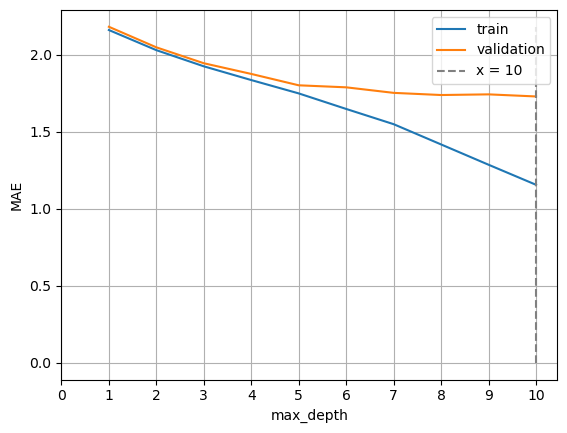

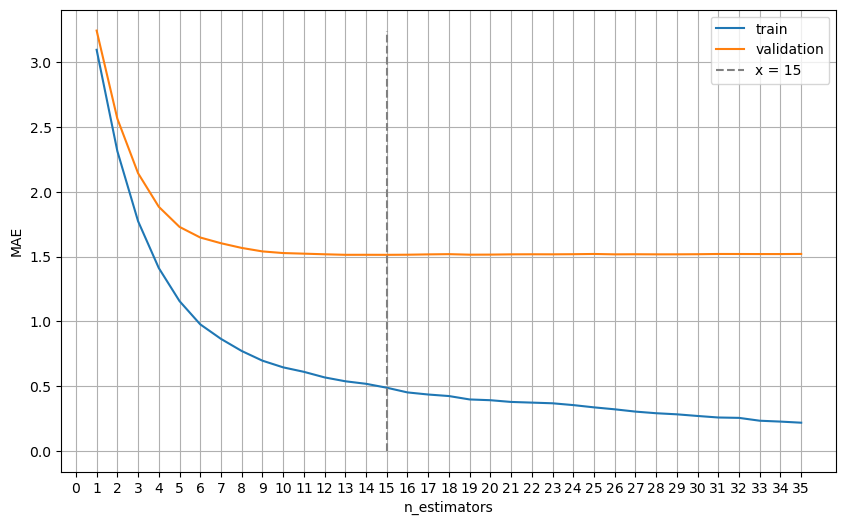

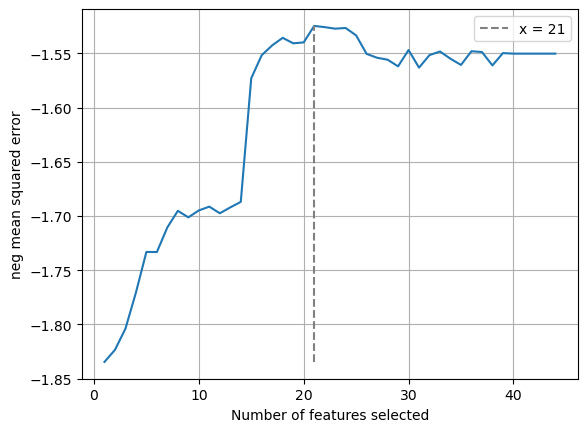

max_depth:  10
Number of estimators:  15
Selected_features:  Index(['lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
       'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER',
       'SLOPE_mean_1km', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FLOW_ACCU_200m', 'landcover',
       'null_island_distance', 'days_distance', 'mo_cos', 'lst',
       'summer_days_year', 'summer_days_month'],
      dtype='object')


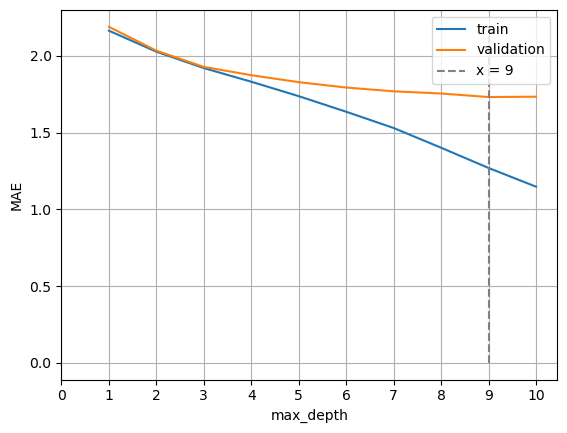

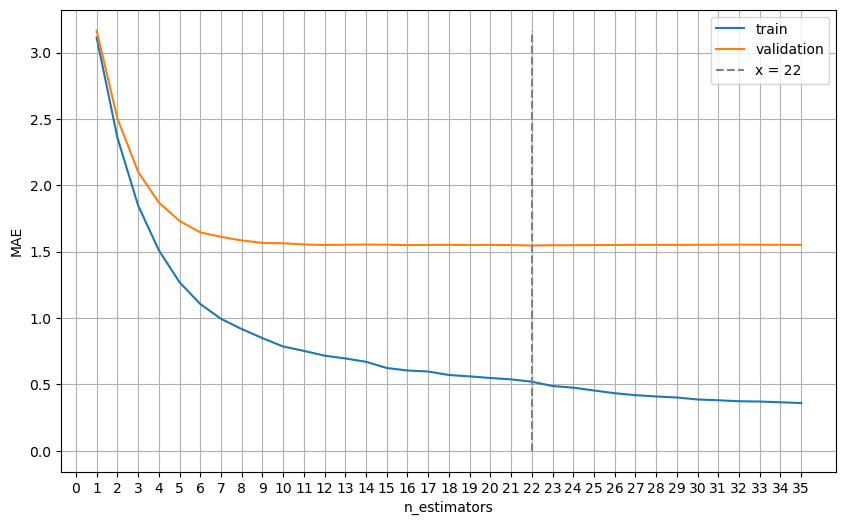

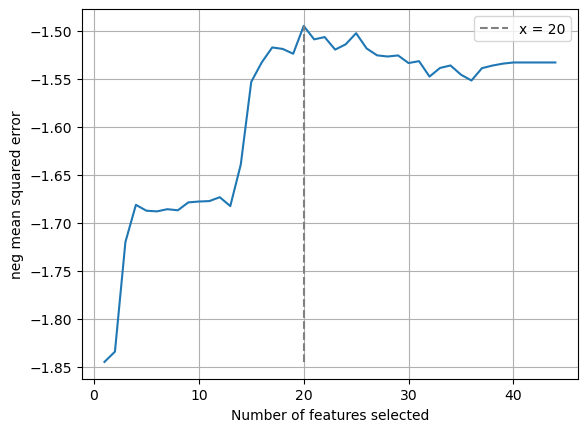

max_depth:  9
Number of estimators:  22
Selected_features:  Index(['lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'lst', 'summer_days_year', 'summer_days_month'],
      dtype='object')


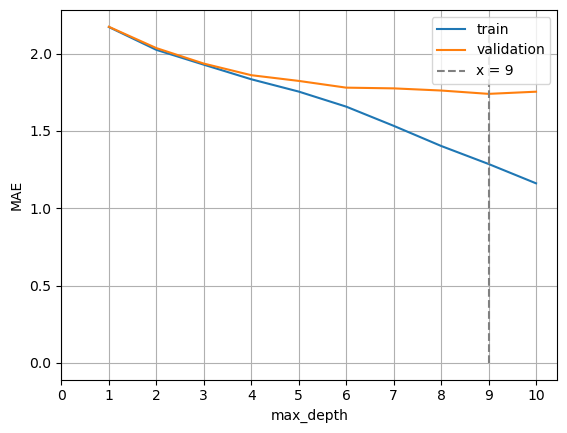

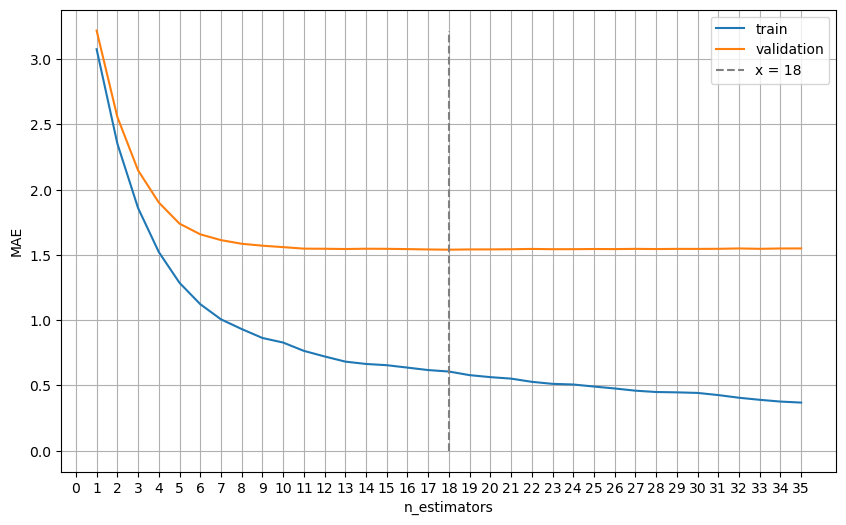

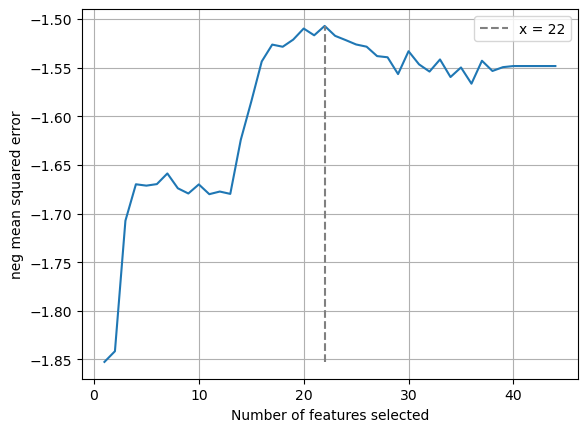

max_depth:  9
Number of estimators:  18
Selected_features:  Index(['lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_jan_night_mean', 'lst_feb_night_mean',
       'lst_mar_night_mean', 'lst_apr_night_mean', 'DISTANCE_TO_COAST',
       'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m',
       'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FLOW_ACCU_200m',
       'landcover', 'null_island_distance', 'days_distance', 'mo_cos', 'lst',
       'summer_days_year', 'summer_days_month'],
      dtype='object')


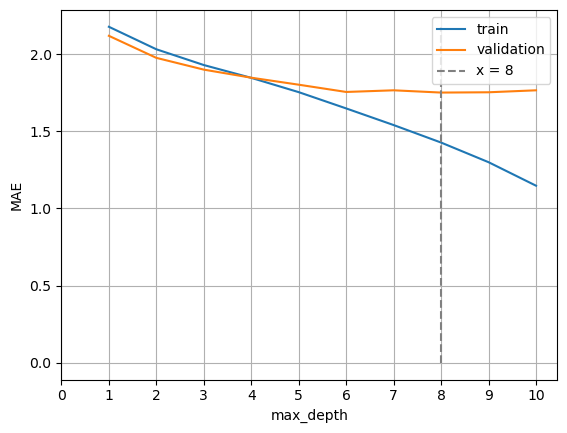

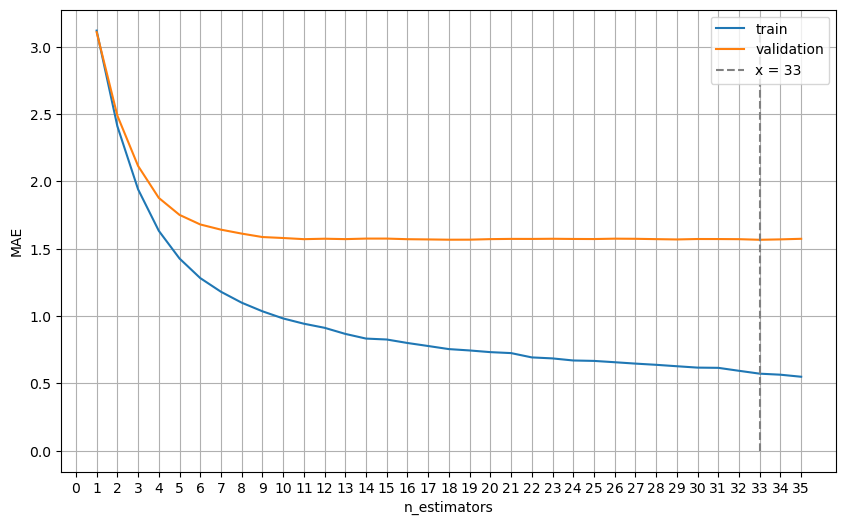

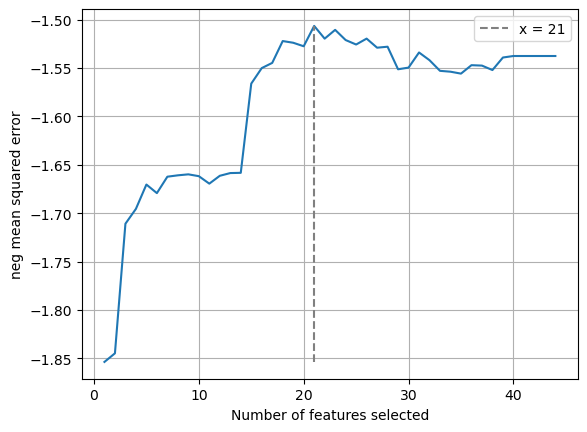

max_depth:  8
Number of estimators:  33
Selected_features:  Index(['lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
       'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER',
       'SLOPE_mean_1km', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FLOW_ACCU_200m', 'landcover',
       'null_island_distance', 'days_distance', 'mo_cos', 'lst',
       'summer_days_year', 'summer_days_month'],
      dtype='object')


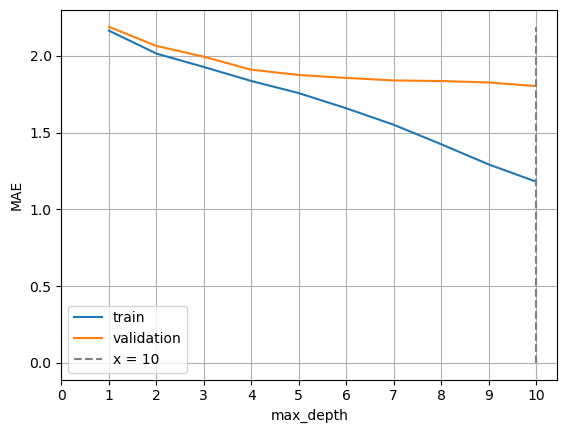

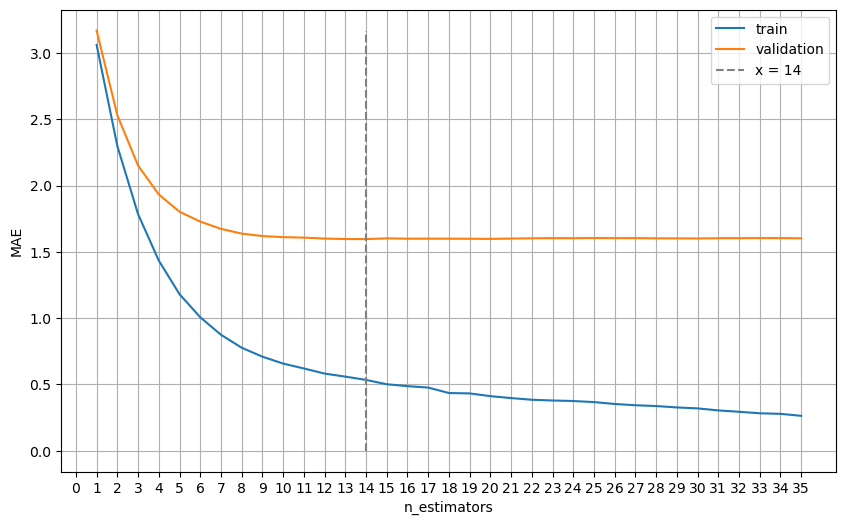

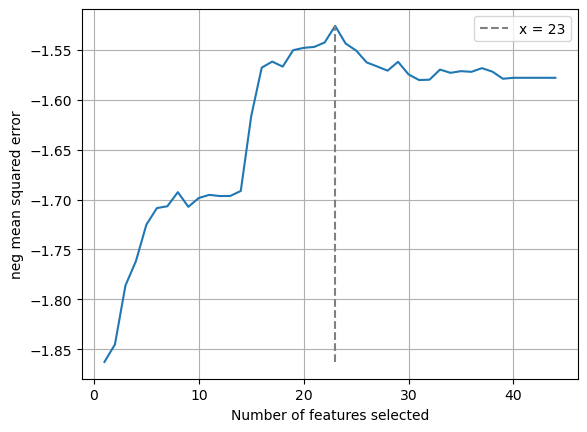

max_depth:  10
Number of estimators:  14
Selected_features:  Index(['acc_rainfall_jan', 'lst_jan_day_mean', 'lst_feb_day_mean',
       'lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'lst', 'summer_days_year', 'summer_days_month'],
      dtype='object')
MAE on train set:  0.6319916964594626
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.891583452211127
Error <= 3: 85.59 %
min prediction: 0.0
max prediction: 9.0


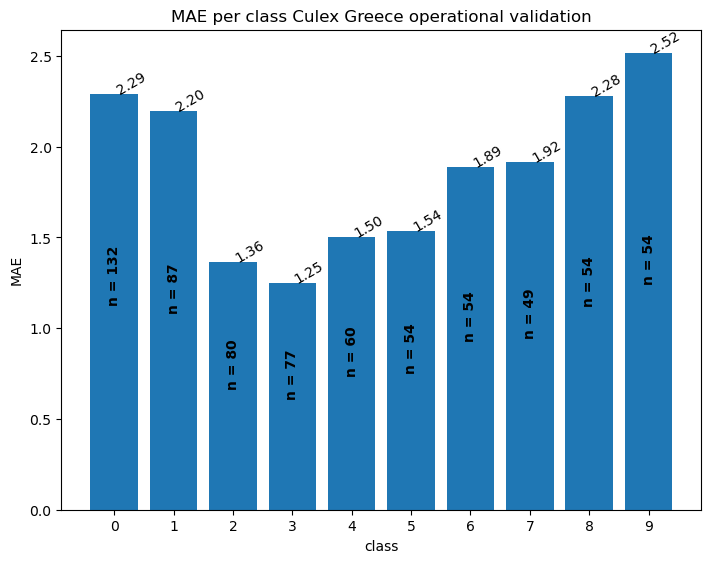

-----------|class error-MAE| difference-----------
mean: 0.6452061282541578
std: 0.41996570021675983
coefficient of variation (std/mean): 0.6509015984599081

----------normalized difference-------------
mean: 0.5073311424509812
std: 0.33022265156983494
coefficient of variation (std/mean): 0.6509015984599079


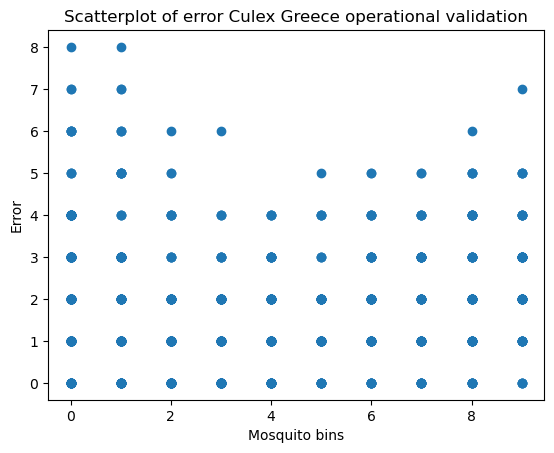

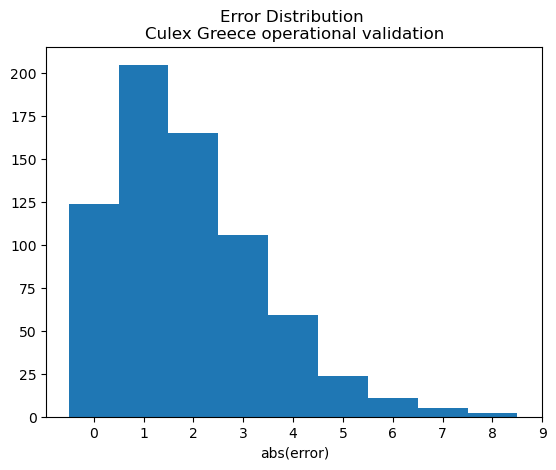

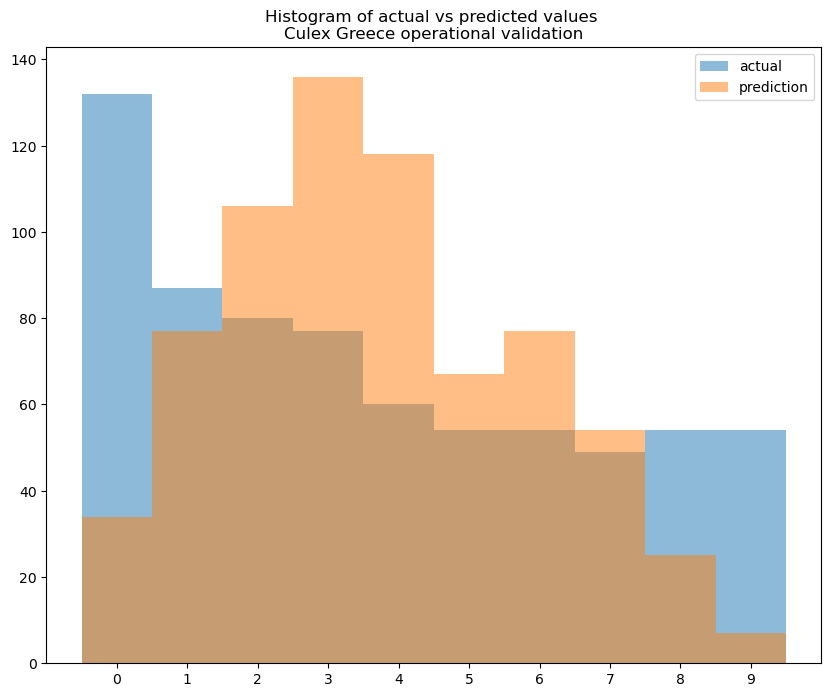

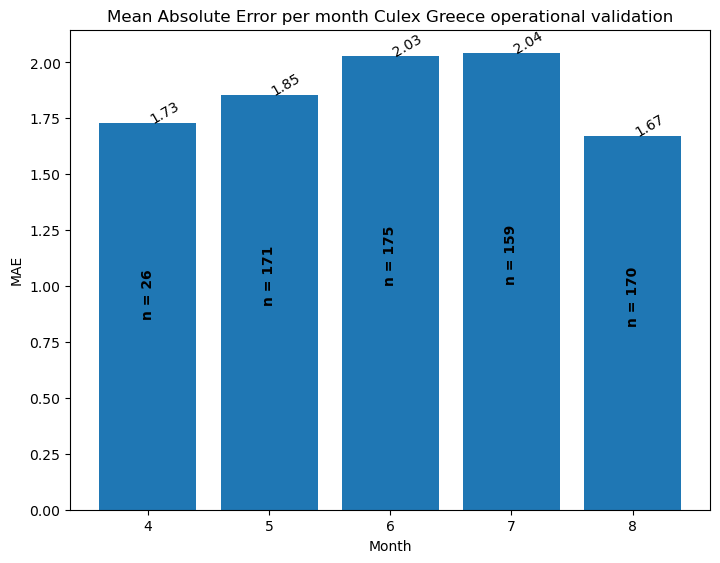

In [8]:
operational_validation(data, model, filepath = path, date_col = date_col,
                       date = '2022-01-01', case = case_title, export= exp)

operational validation:
stable features: 
    MAE on train set:  0.5545784799907738
    MAE on test set:  1.825962910128388
    Error <= 3: 87.87 %
All features:
    MAE on train set:  0.47696344135624497
    MAE on test set:  1.7717546362339516
    Error <= 3: 87.45 %
different fatures:
    MAE on train set:  0.6319916964594626
    MAE on test set:  1.891583452211127
    Error <= 3: 85.59 %